# Output CN plot

In [23]:
# imports
import scgenome.plotting as pl
import h5py
import anndata
import numpy as np

In [24]:
# read output h5
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr006/out_k6a7n1314m6206.h5') # 006
out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr014/out_k6a7n1105m6206.h5') # 014
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr107/out_k6a7n608m6206.h5') # 107
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr107/out_k6a7n608m6206_pi1-10.h5') # 107x
out_file.keys()

<KeysViewHDF5 ['X', 'result']>

In [25]:
for k in out_file['result'].keys():
    ds = out_file['result'][k]
    if isinstance(ds, h5py.Dataset):
        print(k, out_file['result'][k].shape)

cell_assignment (1105, 6)
cn_marginal (6, 6206, 7)
cn_viterbi (6, 6206)
eps_alpha (6, 6)
eps_beta (6, 6)
graph (6, 6)
mu_tau (4, 1105)


In [26]:
# get cell assignment and cell copy number
top_z = out_file['result']['cell_assignment'][...].argmax(axis=1)
clone_cn_np = out_file['result']['cn_viterbi'][...]
cell_cn = clone_cn_np[top_z, :]
cell_cn.shape

(1105, 6206)

In [27]:
# create anndata
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-006.h5')
adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-014.h5')
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-107.h5')
adata.layers['victree-cn'] = cell_cn
adata.layers['marginal'] = np.argmax(out_file['result']['cn_marginal'], axis=-1)[top_z, ...]

















adata.obs['clone'] = top_z

{'ax': <Axes: xlabel='chromosome'>,
 'im': <matplotlib.image.AxesImage at 0x292372200>,
 'adata': View of AnnData object with n_obs × n_vars = 1105 × 6206
     obs: 'multiplier', 'MSRSI_non_integerness', 'MBRSI_dispersion_non_integerness', 'MBRSM_dispersion', 'autocorrelation_hmmcopy', 'cv_hmmcopy', 'empty_bins_hmmcopy', 'mad_hmmcopy', 'mean_hmmcopy_reads_per_bin', 'median_hmmcopy_reads_per_bin', 'std_hmmcopy_reads_per_bin', 'total_mapped_reads_hmmcopy', 'total_halfiness', 'scaled_halfiness', 'mean_state_mads', 'mean_state_vars', 'mad_neutral_state', 'breakpoints', 'mean_copy', 'state_mode', 'log_likelihood', 'true_multiplier', 'column', 'img_col', 'index_i5', 'index_i7', 'is_control', 'library_id', 'primer_i5', 'primer_i7', 'row', 'sample_id', 'sample_type', 'cell_call', 'experimental_condition', 'order', 'is_s_phase', 'is_s_phase_prob', 'quality', 'fastqscreen_mm10', 'coverage_breadth', 'fastqscreen_salmon', 'paired_mapped_reads', 'fastqscreen_salmon_multihit', 'total_reads', 'median

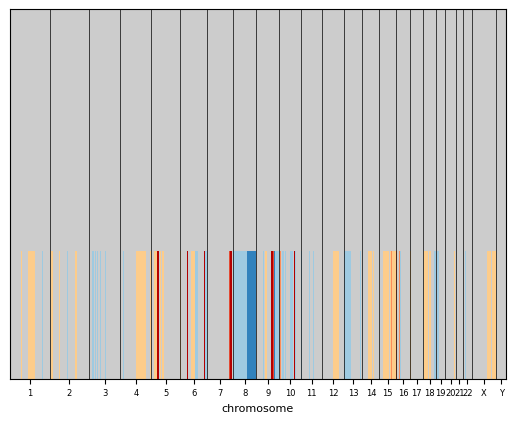

In [28]:
pl.plot_cell_cn_matrix (adata, 'victree-cn', cell_order_fields=['clone'], max_cn=7)

<Axes: xlabel='chromosome'>

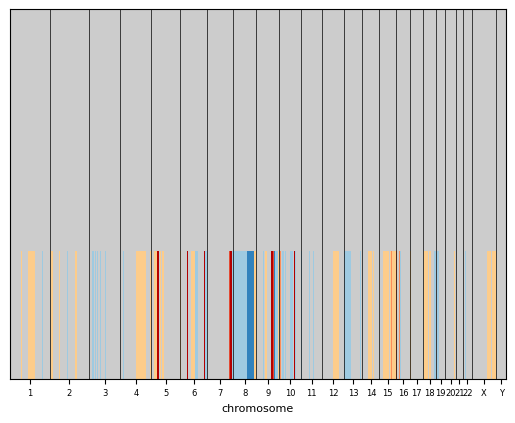

In [29]:
pl.plot_cell_cn_matrix(adata, 'marginal', cell_order_fields=['clone'], max_cn=7)['ax']

<Axes: xlabel='chromosome'>

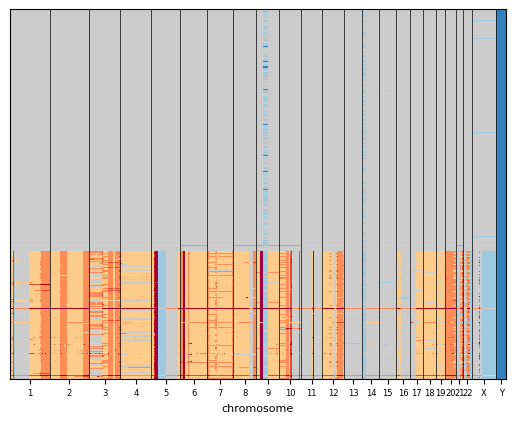

In [30]:
# sort cells based on cluster assignment
pl.plot_cell_cn_matrix(adata, 'state', cell_order_fields=['clone'], max_cn=7)['ax']

In [31]:
import numpy as np
np.unique(top_z, return_counts=True)

(array([0, 5]), array([724, 381]))

In [32]:
out_file['result']['trees'].keys()

<KeysViewHDF5 ['newick', 'weight']>

In [33]:

for t in zip(out_file['result']['trees']['newick'], out_file['result']['trees']['weight']):
    print(t[0])
    print(t[1])
    print('---')

b'((2,(1,5)4)3)0'
0.02043939
---
b'((((5)2)1,3)4)0'
0.013640878
---
b'(((5)1,(3)2)4)0'
0.013598051
---
b'(1,(2,(5)3)4)0'
0.013593179
---
b'((2,(3)4)1,5)0'
0.013571922
---
b'((3,5)2,(1)4)0'
0.013564752
---
b'(2,(1,4)3,5)0'
0.01355846
---
b'((1,4)2,3,5)0'
0.013556236
---
b'((2,((5)3)4)1)0'
0.013550264
---
b'((1)2,(4,5)3)0'
0.013547564
---
b'((1,(3)2,5)4)0'
0.013543362
---
b'(((4,5)2,3)1)0'
0.013538791
---
b'(((2,3)4,5)1)0'
0.0135366
---
b'((1,(2,5)4)3)0'
0.0135211
---
b'((4)1,(2,5)3)0'
0.013488823
---
b'(((3)1,5)2,4)0'
0.013478719
---
b'(1,(((5)2)4)3)0'
0.013476964
---
b'((2,(3,5)4)1)0'
0.013476209
---
b'(2,((1,5)4)3)0'
0.0134605905
---
b'(((2,(5)4)1)3)0'
0.01343996
---
b'((3,5)1,(4)2)0'
0.0134385275
---
b'(((5)2,3)1,4)0'
0.013409871
---
b'(((3)1)2,(5)4)0'
0.013383034
---
b'((2)1,(5)3,4)0'
0.013311512
---
b'(((3,(1)4)2)5)0'
0.012144192
---
b'(((1,(4)2)3)5)0'
0.012141792
---
b'(((1,2,4)3)5)0'
0.012141299
---
b'((((4)1,2)3)5)0'
0.01205685
---
b'((((1)5)2,3)4)0'
0.012046414
---
b'(((((1)5)3